In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset from the Excel file
file_path_psp = '../data/raw/PSP_Jan_Feb_2019.xlsx'
file_path_fee = '../data/raw/PSP_Fees.xlsx'
file_path_processed_data = '../data/processed/PSP_model_data.xlsx'
df = pd.read_excel(file_path_psp)
df_fee = pd.read_excel(file_path_fee)

# Define attempts

Definition: 
* Same country
* Same amount
* Less than 60 seconds between the tsmp

In [2]:
# Sort the dataset by 'country', 'amount', 'PSP', and 'tmsp'
df_sorted = df.sort_values(by=['tmsp', 'country', 'amount', 'PSP']).reset_index(drop=True)
df_sorted['previous_failure'] = 0

# Initialize an empty list to store the 'attempts' values
attempts = [1]  # The first row will always have an attempt value of 1

# Loop through the sorted DataFrame to calculate the 'attempts'
for i in range(1, len(df_sorted)):
    row = df_sorted.iloc[i]
    prev_row = df_sorted.iloc[i-1]

    # Check if 'country', 'amount', and 'PSP' are the same and 'tmsp' is within 60 seconds
    if (row['country'] == prev_row['country'] and
        row['amount'] == prev_row['amount'] and
        (row['tmsp'] - prev_row['tmsp']).seconds < 60):
        attempts.append(attempts[-1] + 1)
        df_sorted.loc[i, ['previous_failure']] = 1
    else:
        attempts.append(1)
        df_sorted.loc[i, ['previous_failure']] = 0

# Add the 'attempts' column to the DataFrame
df_sorted['attempts'] = attempts

# Show the first few rows
df_sorted.head(50)

,index,tmsp,country,amount,success,PSP,3D_secured,card,previous_failure,attempts
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,0,1
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,2
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,0,1
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,2
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0,1
5,5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master,0,1
6,6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master,1,2
7,7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master,0,1
8,8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa,0,1
9,9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa,1,2


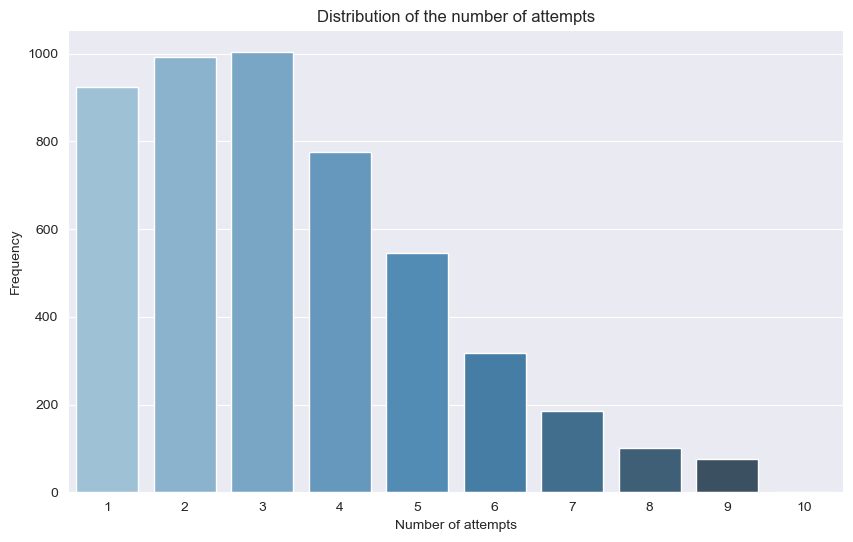

1      923
2      993
3     1003
4      776
5      546
6      317
7      185
8      102
9       75
10       1
Name: attempts, dtype: int64


In [3]:
# Group the data by 'country', 'amount', 'PSP', and 'attempts' and count unique attempts
unique_attempts_count = df_sorted.groupby(['country', 'amount', 'PSP'])['attempts'].max().reset_index()
unique_attempts_distribution = unique_attempts_count['attempts'].value_counts().sort_index()

# Plot the distribution of 'attempts'
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_attempts_distribution.index, y=unique_attempts_distribution.values, palette="Blues_d")
plt.title('Distribution of the number of attempts')
plt.xlabel('Number of attempts')
plt.ylabel('Frequency')
plt.show()

print(unique_attempts_distribution)

In [4]:
# Merge the fees DataFrame with the original dataset based on 'PSP' and 'success'
df_merged = pd.merge(df_sorted, df_fee, on=['PSP', 'success'], how='left')

# Show the first few rows of the merged DataFrame to verify
df_merged.head()

,index,tmsp,country,amount,success,PSP,3D_secured,card,previous_failure,attempts,fee
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,0,1,1.0
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,2,3.0
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,0,1,1.0
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,2,3.0
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0,1,0.5


# Time-related features

In [5]:
# Extract time-related features
df_merged['weekday'] = df_merged['tmsp'].dt.day_name()
df_merged['hour'] = df_merged['tmsp'].dt.hour

# Create time-of-day feature
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df_merged['time_of_day'] = pd.cut(df_merged['hour'], bins=bins, labels=labels, right=False)

# Transactional features

In [6]:
# Create transaction-related features
df_merged['log_amount'] = np.log1p(df_merged['amount'])  # log1p is used to handle zero amounts

# Create interactive features
df_merged['country_PSP'] = df_merged['country'] + "_" + df_merged['PSP']
df_merged['PSP_3D_secured'] = df_merged['PSP'] + "_" + df_merged['3D_secured'].astype(str)

# Group the amount variable
df_merged['amount_group'] = pd.qcut(df['amount'], 3, labels=['small', 'medium', 'large'])

# Show the first few rows of the DataFrame to verify the new features
df_merged.head()

,index,tmsp,country,amount,success,PSP,3D_secured,card,previous_failure,attempts,fee,weekday,hour,time_of_day,log_amount,country_PSP,PSP_3D_secured,amount_group
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,0,1,1.0,Tuesday,0,Night,4.499810,Germany_UK_Card,UK_Card_0,small
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,2,3.0,Tuesday,0,Night,4.499810,Germany_UK_Card,UK_Card_0,small
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,0,1,1.0,Tuesday,0,Night,5.476464,Germany_UK_Card,UK_Card_1,medium
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,2,3.0,Tuesday,0,Night,5.476464,Germany_UK_Card,UK_Card_1,medium
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0,1,0.5,Tuesday,0,Night,4.828314,Austria_Simplecard,Simplecard_0,small


In [7]:
# Save data
df_merged.to_excel(file_path_processed_data, index=False)